[TNG API LINK](https://www.tng-project.org/data/docs/api/)

In [1]:
import requests
import matplotlib.pyplot as mpl
import numpy as np
import h5py
%matplotlib inline

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"9af02c30810f12be44f17ad2bd4b6510"}

sim_name = 'TNG100-1-Dark'
redshift = 0.0
base_query = f'/api/{sim_name}/snapshots/z={redshift}'

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r


In [2]:
r = get(baseUrl)
r['simulations']

names = [sim['name'] for sim in r['simulations']]

In [3]:
i = names.index(sim_name)
sim = get(r['simulations'][i]['url'] )
snaps = get( sim['snapshots'] )


snap = get( snaps[-1]['url'] )

In [4]:
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )

In [5]:
#i = 15 #120 mb
#i = 10 #560 mb
i = 15
sub = get( subs['results'][i]['url'] )

<HDF5 file "cutout_15.hdf5" (mode r)>


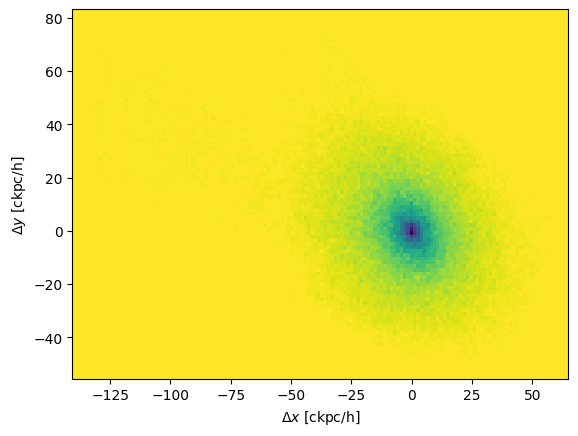

In [8]:
sub_prog_url = sub['meta']['url']
sub_prog = get(sub_prog_url)


cutout_request = {'dm':'Coordinates,SubfindDMDensity'}
cutout = get(sub_prog_url+"cutout.hdf5", cutout_request)
#cutout = get(sub_prog_url+"cutout.hdf5")

with h5py.File(cutout,'r') as f:
    print(f)
    x = f['PartType1']['Coordinates'][:,0] - sub_prog['pos_x']
    y = f['PartType1']['Coordinates'][:,1] - sub_prog['pos_y']
    z = f['PartType1']['Coordinates'][:,2] - sub_prog['pos_z']
    dens = np.log10(f['PartType1']['SubfindDMDensity'][:])
    plt.hist2d(x,y,weights=dens,bins=[150,100])
    plt.xlabel('$\Delta x$ [ckpc/h]')
    plt.ylabel('$\Delta y$ [ckpc/h]')

plt.show()